## -Two way ANOVA

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create a random dataset with numpy
# you can use any data

df =pd.DataFrame({'water':np.repeat(['daily','weekly'],15),
                  'sun':np.tile(np.repeat(['low','medium','high'],5),2),
                  'height':[6,5,6,6,5,5,5,6,6,5,
                            6,7,8,3,4,5,6,7,8,6,
                            4,5,6,7,8,3,4,5,6,3]})

df.sample(10)

,water,sun,height
20,weekly,medium,4
29,weekly,high,3
7,daily,medium,6
21,weekly,medium,5
17,weekly,low,7
6,daily,medium,5
1,daily,low,5
4,daily,low,5
9,daily,medium,5
13,daily,high,3


<AxesSubplot:xlabel='sun', ylabel='height'>

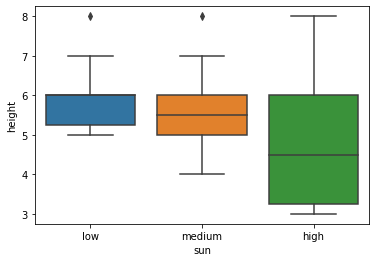

In [3]:
# lets just first see how we did one-way anova, and to do it with this given data frame.
# lets see the height of plant with different sunlight 
# for this we can make simple box plot

sns.boxplot(x='sun', y='height', data=df)

> when we had one factor(sun) to compare it continius var, we called it One-way ANOVA.

> Now lets add another factor 'water', we have 2 factors to compare agains one contin var, its called TWO-WAY ANOVA

<AxesSubplot:xlabel='sun', ylabel='height'>

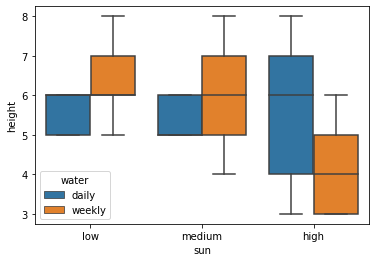

In [4]:
sns.boxplot(x='sun', y='height', data=df, hue='water')

In [5]:
# now apply anova test

import statsmodels.api as sm
from statsmodels.formula.api import ols

# One-way ANOVA

model = ols('height ~ sun' , data= df).fit()
sm.stats.anova_lm(model,type=2)

# here we have only one factor 'sun' , so, its one-way anova

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,6.466667,3.233333,1.781633,0.187592
Residual,27.0,49.000000,1.814815,NaN,NaN


In [6]:
# two-way ANOVA
# if we add more factors along with 'sun', its called 2 way anova
# copy same above code and made little changes

model = ols('height ~ C(sun)+ C(water)+ C(sun):C(water)' , data= df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,6.466667e+00,3.233333e+00,1.865385e+00,0.176600
C(water),1.0,1.972152e-31,1.972152e-31,1.137780e-31,1.000000
C(sun):C(water),2.0,7.400000e+00,3.700000e+00,2.134615e+00,0.140206
Residual,24.0,4.160000e+01,1.733333e+00,NaN,NaN


**C(sun)**	: sun significant effect.its PR(>F) value is less than 0.05 , meaning it has effect on plant height.\
**C(water):** water significant effect.\
**C(sun):C(water):** result PR(>F) shows that there is no significant difference(0.140206 because the value > 0.05)

In [7]:
# another way of doing two-way ANOVA

import pingouin as pg
aov = pg.anova(data=df, dv='height', between=['sun','water'],detailed=True)
print(aov)

        Source         SS  DF        MS         F     p-unc       np2
0          sun   6.466667   2  3.233333  1.865385  0.176600  0.134535
1        water   0.000000   1  0.000000  0.000000  1.000000  0.000000
2  sun * water   7.400000   2  3.700000  2.134615  0.140206  0.151020
3     Residual  41.600000  24  1.733333       NaN       NaN       NaN


c:\Users\AhmadLap\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


**Assignment:** 
* how to apply tucky test on two-way ANOVA?
* how to do lattering and grouping?
* how to do annotation in graphs?

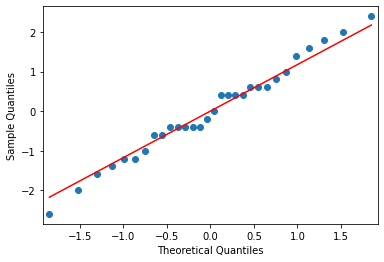

In [8]:
# one extra thing: we can also make qq-plot of above data
# qq- norm plot

res= model.resid
fig = sm.qqplot(res, line='s')
plt.show()

# agar ye line achhi/straight bny to matlb ye result theek aya hy,